<h1> <b> CS374 - Computational and Numerical Methods Lab 6 </b> </h1>

```
Vraj Gandhi        -  202201425
Kaushik Prajapati  -  202201472
```

<h2> <b>Interpolation </b></h2>
<p> Basic library importing for ploting, styling and table creation.

In [1]:
import numpy as np
import math as mt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

<p> Interpolation class with eleven important methods.

1. <i><b>initialization()</b></i> : Method that stores dataset and computes newton polynomial factors and lagrang's polynomial factors.
2. <i><b>vandermonde_matrix()</b></i> : Method to generate Vandermonde Matrix using given dataset.
3. <i><b>vandermonde_polynomial_coefficients()</b></i> : Method that solves Vandermonde Matrix and calculates polynomial coefficients.
4. <i><b>lagrange_factors()</b></i> : Method that calculates multiplicative factors of Lagrang's Polynomial Interpolation.
5. <i><b>lagranges_polynomial_coefficients()</b></i> : Method that calculates polynomial coefficients for Lagrange's Interpolation.
6. <i><b>lagrange_polynomial()</b></i> : Method to find approximated value of function $f(x)$ at point $x$ using Lagrange's Interpolation.
7. <i><b>plotLI()</b></i> : Method to plot the Lagrange's Intepolated Polynomial.
8. <i><b>newton_factors()</b></i> : Method that calculates multiplicative factors of Newton's Polynomial Interpolation.
9. <i><b>newtons_polynomial_coefficients()</b></i> : Method that calculates polynomial coefficients for Newton's Interpolation.
10. <i><b>newton_polynomial()</b></i> : Method to find approximated value of function $f(x)$ at point $x$ using Newton's Interpolation.
11. <i><b>plotN()</b></i> : Method to plot the Newton's Intepolated Polynomial.






In [2]:
class interpolation:

    def __init__(self, points):
        if points:
            self.initialization(points)

    def initialization(self, points):
        self.points = points
        self.N = len(points)
        self.x = [self.points[i][0] for i in range(self.N)]
        self.y = [self.points[i][1] for i in range(self.N)]
        self.new_factors = self.newton_factors()
        self.lag_factors = self.lagrange_factors()

    ##### Finding Interpolated Polynomial Coefficients using Vandermonde Matrix

    ## Function to find Vandermonde Matrix V
    def vandermonde_matrix(self):
        V = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                V[i][j] = self.x[i] ** j
        return V

    ## Solving system of linear equations to find polynomial coefficients
    def vandermonde_polynomial_coefficients(self):
        V = self.vandermonde_matrix()
        coefficients = np.linalg.solve(V, self.y)
        return list(np.round(coefficients, 8))

    ##### End

    ##### Lagrang's Interpolation

    ## Lagrange's Polynomial Multiplication Factors
    def lagrange_factors(self):
        factors = np.zeros(self.N)
        for i in range(self.N):
            yi = self.y[i]
            div = 1.0
            for j in range(self.N):
                if i != j:
                    div *= (self.x[i] - self.x[j])
            factors[i] = yi / div
        return factors


    ## Finding Interpolated Polynomial Coefficients using Lagrang's Method
    def lagranges_polynomial_coefficients(self):

        # stores coeffi of power [x^0, x^1, ..., x^n]
        p_coefficients = np.zeros(self.N, dtype=float)

        # for each Lk
        for k in range(self.N):

            # x-values that contribute to this Lk
            values = self.x[:k] + self.x[k+1:]

            # stores coeffi of power [x^0, x^1, ..., x^n] for Lk()
            coeffi_k = []

            # Generation of nCk and finding coefficients
            for j in range(len(values), -1, -1):

                combinations_list = list(combinations(values, j))
                coeffi_of_power_j = 0

                for comb in combinations_list:
                    product = 1
                    for val in comb:
                        product *= val
                    coeffi_of_power_j += product
                # End

                coeffi_k.append((-1)**(j) * self.lag_factors[k] * coeffi_of_power_j)
            # End

            p_coefficients += np.array(coeffi_k)
        return list(np.round(p_coefficients, 8))

    ## Lagrange's Polynomial Approximation
    def lagrange_polynomial(self, x):
        res = 0.0
        for k in range(self.N):
            prod = 1.0
            for i in range(self.N):
                if i == k:
                    continue
                prod *= (x - self.points[i][0])
            res += self.lag_factors[k] * prod
        return res

    ## Plot Lagranges Interpolated Polynomial
    def plotLI(self, function=[], xlim=(-5, 5), ylim=(-5, 5), N = 100):

        x_values = np.linspace(xlim[0], xlim[1], N)
        y_aprx = np.zeros(N, dtype=float)
        for i in range(N):
            y_aprx[i] = self.lagrange_polynomial(x_values[i])

        plt.figure()
        if len(function) != 0:
            y_actual = function[0](x_values)
            plt.plot(x_values, y_actual, label="Actual Function")
        plt.plot(self.x, self.y, 'o', label="Points")
        plt.plot(x_values, y_aprx, label="Lagrange's Interpolation")
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.grid()
        plt.show()
        return y_aprx

    ##### End


    ##### Newton's Interpolation

    ## Newtons's Polynomial factors
    def newton_factors(self):
        divided_diff = np.zeros((self.N, self.N)) # DD table
        divided_diff[:, 0] = self.y

        # Compute DD table values
        for j in range(1, self.N):
            for i in range(self.N - j):
                divided_diff[i][j] = (divided_diff[i+1][j-1] - divided_diff[i][j-1]) / (self.x[i+j] - self.x[i])

        # Diagonals are divided difference factors of newtons interpolated polynomial
        factors = divided_diff[0, :]
        return factors


    ## Finding Interpolated Polynomial Coefficients using Lagrang's Method
    def newtons_polynomial_coefficients(self):

        # stores coeffi of power [x^0, x^1, ..., x^n]
        p_coefficients = np.zeros(self.N, dtype=float)

        for k in range(self.N):

            # x-values that contribute to this Lk
            values = self.x[:k]

            # stores coeffi of power [x^0, x^1, ..., x^n] for kth term
            coeffi_k = []

            # Generation of nCk and finding coefficients
            for j in range(len(values), -1, -1):

                combinations_list = list(combinations(values, j))
                coeffi_of_power_j = 0

                for comb in combinations_list:
                    product = 1
                    for val in comb:
                        product *= val
                    coeffi_of_power_j += product
                # End

                coeffi_k.append((-1)**(j) * coeffi_of_power_j)
            # End

            # Appending n-k zeros
            for j in range(k+1, self.N):
                coeffi_k.append(0.0)

            p_coefficients += (self.new_factors[k] * np.array(coeffi_k))
        return list(np.round(p_coefficients, 8))


    ## Newton's Polynomial Approximation
    def newton_polynomial(self, x):
        result = self.new_factors[0]
        prod = 1.0
        for i in range(1, self.N):
            prod *= (x - self.points[i-1][0])
            result += self.new_factors[i] * prod
        return result

    ## Plot Newton's Interpolated Polynomial
    def plotN(self, function=[], xlim=(-5, 5), ylim=(-5, 5), N = 100, true_plot=True):

        x_values = np.linspace(xlim[0], xlim[1], N)
        y_aprx = np.zeros(N, dtype=float)
        for i in range(N):
            y_aprx[i] = self.newton_polynomial(x_values[i])

        plt.figure()
        if len(function) != 0:
            y_actual = function[0](x_values)
            plt.plot(x_values, y_actual, label="Actual Function")
        plt.plot(self.x, self.y, 'o', label="Points")
        plt.plot(x_values, y_aprx, label="Newton's Interpolation")
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.grid()
        return y_aprx

    ##### End

<h2> <b>Lagrange's Interpolation </b></h2>

<p align='justify'> Q1. Write a function $mypolyint$ that takes in an $n$ x $2$ matrix whose row $i$ contains points $(x_i, y_i)$ and returns coefficients of the polynomial that interpolates the given points, using <b>Lagrange's interpolation</b>. Your function should also plot the graph of the function showing that it does interpolate the given set of points. </p>

<p align='justify'> Show a few example plots of points $(x_i, y_i)$, $i = 1,2, …,n$ and the interpolating polynomial graph passing through the points using <b>Lagrange's Interpolation</b>.
<p><b>Example :</b>

Vandermonde Polynomial Coefficients:  [4.6553457, -3.23294816, 1.74637586, -0.07490931, -0.11718305, 0.02516455, -0.00189424, 4.866e-05]
Lagranges Polynomial Coefficients:  [4.6553457, -3.23294816, 1.74637586, -0.07490931, -0.11718305, 0.02516455, -0.00189424, 4.866e-05]


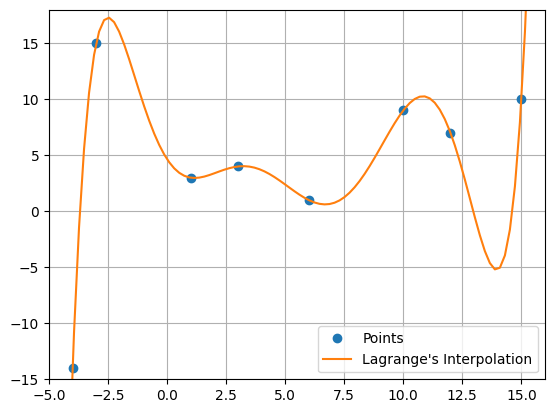

In [3]:
points = [[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(xlim=(-5, 16), ylim=(-15, 18))

1. Interpolate $y = sin(x)$ with $ T = [(-π, 0), (-π/2, -1), (0, 0), (π/2, 1), (π, 0)] $

Vandermonde Polynomial Coefficients:  [0.0, 0.84882636, 0.0, -0.08600409, -0.0]
Lagranges Polynomial Coefficients:  [0.0, 0.84882636, 0.0, -0.08600409, 0.0]


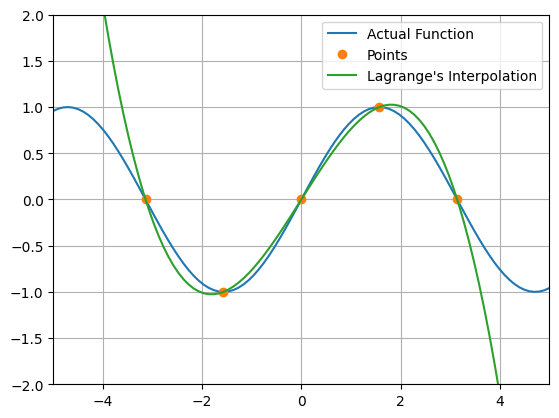

In [4]:
points = [[0, 0], [np.pi/2, 1], [-np.pi/2, -1], [np.pi, 0], [-np.pi, 0]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(function=[lambda x: np.sin(x)], xlim=(-5, 5), ylim=(-2, 2))

2. Interpolate $y = e^x$ with $ T = [(-2, 0.1353), (-0.5, 0.6065), (0, 1), (1.5, 4.4817), (3, 20.0855)] $

Vandermonde Polynomial Coefficients:  [1.0, 0.93716048, 0.39607, 0.23138667, 0.07977714]
Lagranges Polynomial Coefficients:  [1.0, 0.93716048, 0.39607, 0.23138667, 0.07977714]


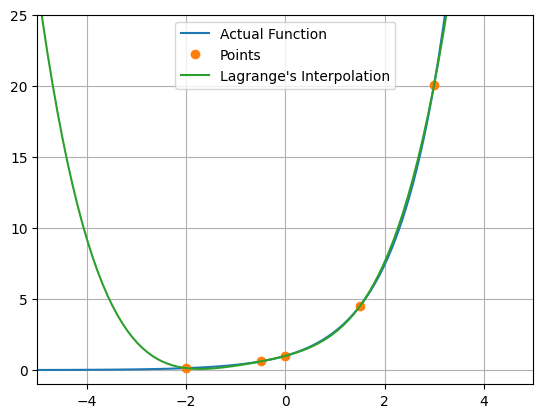

In [5]:
points = [[-2, 0.1353], [-0.5, 0.6065], [0, 1], [1.5, 4.4817], [3, 20.0855]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(function=[lambda x: np.exp(x)], xlim=(-5, 5), ylim=(-1, 25))

3. Interpolate $y = 2sin(πx)/πx$ with $ T = [(-2.5, 0.2546), (-0.5, 1.2732), (0, 2), (0.5, 1.2732), (2.5, 0.2546)] $

Vandermonde Polynomial Coefficients:  [2.0, 0.0, -3.01669733, -0.0, 0.43798933]
Lagranges Polynomial Coefficients:  [2.0, -0.0, -3.01669733, -0.0, 0.43798933]


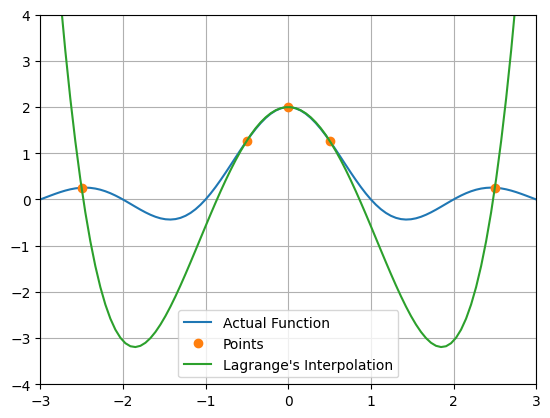

In [6]:
points = [[-2.5, 0.2546], [-0.5, 1.2732], [0, 2], [0.5, 1.2732], [2.5, 0.2546]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(function=[lambda x: 2*np.sinc(x)], xlim=(-3, 3), ylim=(-4, 4))

4. Interpolate $y = e^xsin(x)$ with $ T = [(-2, -0.1231), (-1, -0.3096), (0, 0.0), (1, 2.2873), (2, 6.7188)] $

Vandermonde Polynomial Coefficients:  [0.0, 1.16110833, 1.04364583, 0.13734167, -0.05479583]
Lagranges Polynomial Coefficients:  [0.0, 1.16110833, 1.04364583, 0.13734167, -0.05479583]


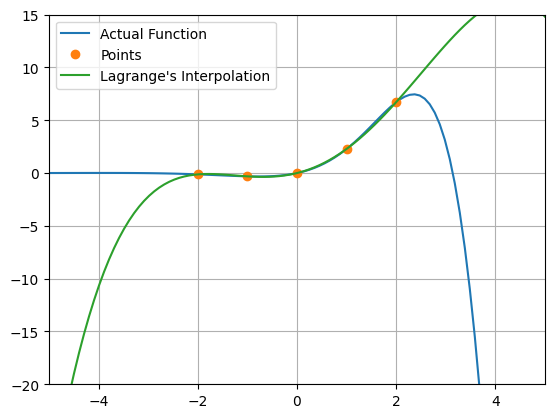

In [7]:
points = [[-2, -0.1231], [-1, -0.3096], [0, 0.0], [1, 2.2873], [2, 6.7188]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(function=[lambda x: np.exp(x) * np.sin(x)], xlim=(-5, 5), ylim=(-20, 15))

5. Interpolate $y = e^{-x^2/2}$ with $ T = [(-2, 0.1353), (-1, 0.6065), (0, 1.0), (1, 0.6065), (2, 0.1353)] $

Vandermonde Polynomial Coefficients:  [1.0, 0.0, -0.45260833, -0.0, 0.05910833]
Lagranges Polynomial Coefficients:  [1.0, -0.0, -0.45260833, 0.0, 0.05910833]


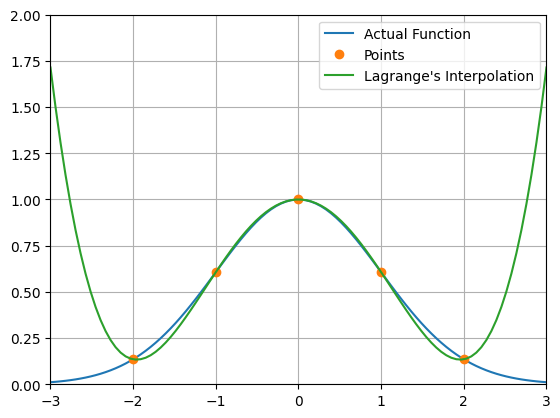

In [8]:
points = [[-2, 0.1353], [-1, 0.6065], [0, 1.0], [1, 0.6065], [2, 0.1353]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_l = inter.lagranges_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_l)
y_aprx = inter.plotLI(function=[lambda x: np.exp((-1 * x ** 2)/2)], xlim=(-3, 3), ylim=(0, 2))

<h2> <b>Newton's Interpolation </b></h2>

<p align='justify'> Q2. Write a function $mynewtonint$ that takes in an $n x 2$ matrix whose row $i$ contains points $(x_i,y_i)$, and returns coefficient vector of the Newton's polynomial that interpolates the given points. Your function should also plot the graph of the polynomial (at given and several
intermediate points) showing that it does interpolate the given set of points.</p>

<p align='justify'> Show a few example plots of points $(x_i, y_i)$, $i = 1,2, …,n$ and the interpolating polynomial graph passing through the points using <b>Newton's Interpolation</b>.
<p><b>Example :</b>

Vandermonde Polynomial Coefficients:  [4.6553457, -3.23294816, 1.74637586, -0.07490931, -0.11718305, 0.02516455, -0.00189424, 4.866e-05]
Lagranges Polynomial Coefficients:  [4.6553457, -3.23294816, 1.74637586, -0.07490931, -0.11718305, 0.02516455, -0.00189424, 4.866e-05]


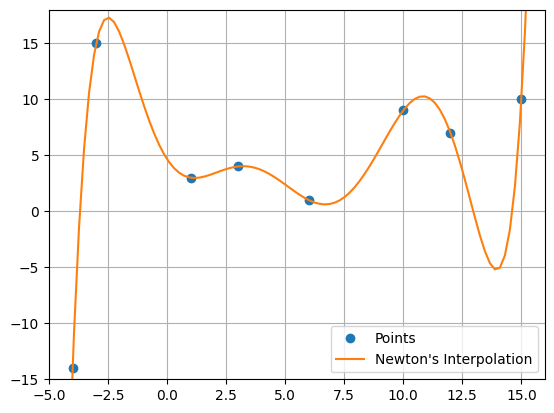

In [9]:
points = [[1,3], [3,4], [6,1], [-3, 15], [-4, -14], [15, 10], [10, 9], [12, 7]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Lagranges Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(xlim=(-5, 16), ylim=(-15, 18))

1. Interpolate $y = sin(x)$ with $ T = [(-π, 0), (-π/2, -1), (0, 0), (π/2, 1), (π, 0)] $

Vandermonde Polynomial Coefficients:  [0.0, 0.84882636, 0.0, -0.08600409, -0.0]
Newtons Polynomial Coefficients:  [0.0, 0.84882636, 0.0, -0.08600409, 0.0]


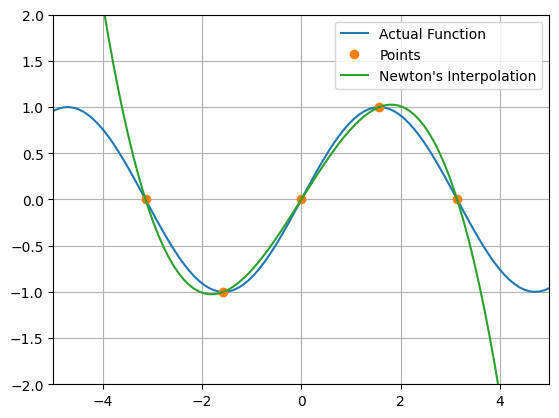

In [10]:
points = [[0, 0], [np.pi/2, 1], [-np.pi/2, -1], [np.pi, 0], [-np.pi, 0]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(function=[lambda x: np.sin(x)], xlim=(-5, 5), ylim=(-2, 2))

2. Interpolate $y = exp(x)$ with $ T = [(-2, 0.1353), (-0.5, 0.6065), (0, 1), (1.5, 4.4817), (3, 20.0855)] $

Vandermonde Polynomial Coefficients:  [1.0, 0.93716048, 0.39607, 0.23138667, 0.07977714]
Newtons Polynomial Coefficients:  [1.0, 0.93716048, 0.39607, 0.23138667, 0.07977714]


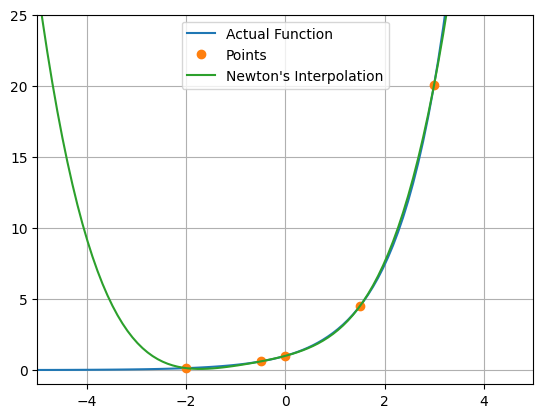

In [11]:
points = [[-2, 0.1353], [-0.5, 0.6065], [0, 1], [1.5, 4.4817], [3, 20.0855]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(function=[lambda x: np.exp(x)], xlim=(-5, 5), ylim=(-1, 25))

3. Interpolate $y = 2sin(πx)/πx$ with $ T = [(-2.5, 0.2546), (-0.5, 1.2732), (0, 2), (0.5, 1.2732), (2.5, 0.2546)] $

Vandermonde Polynomial Coefficients:  [2.0, 0.0, -3.01669733, -0.0, 0.43798933]
Newtons Polynomial Coefficients:  [2.0, 0.0, -3.01669733, 0.0, 0.43798933]


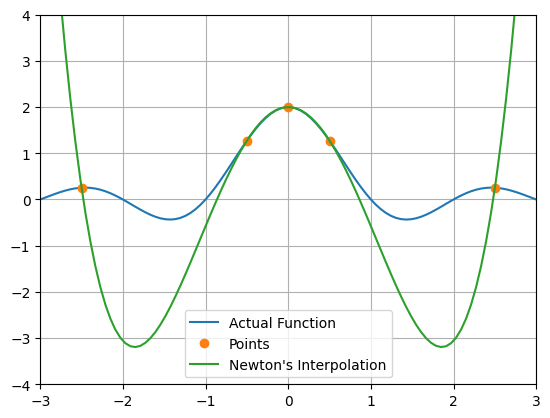

In [12]:
points = [[-2.5, 0.2546], [-0.5, 1.2732], [0, 2], [0.5, 1.2732], [2.5, 0.2546]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(function=[lambda x: 2*np.sinc(x)], xlim=(-3, 3), ylim=(-4, 4))

4. Interpolate $y = e^xsin(x)$ with $ T = [(-2, -0.1231), (-1, -0.3096), (0, 0.0), (1, 2.2873), (2, 6.7188)] $

Vandermonde Polynomial Coefficients:  [0.0, 1.16110833, 1.04364583, 0.13734167, -0.05479583]
Newtons Polynomial Coefficients:  [0.0, 1.16110833, 1.04364583, 0.13734167, -0.05479583]


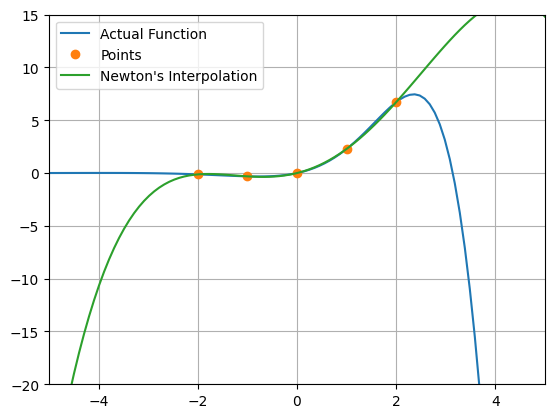

In [13]:
points = [[-2, -0.1231], [-1, -0.3096], [0, 0.0], [1, 2.2873], [2, 6.7188]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(function=[lambda x: np.exp(x) * np.sin(x)], xlim=(-5, 5), ylim=(-20, 15))

5. Interpolate $y = e^{-x^2/2}$ with $ T = [(-2, 0.1353), (-1, 0.6065), (0, 1.0), (1, 0.6065), (2, 0.1353)] $

Vandermonde Polynomial Coefficients:  [1.0, 0.0, -0.45260833, -0.0, 0.05910833]
Newtons Polynomial Coefficients:  [1.0, 0.0, -0.45260833, 0.0, 0.05910833]


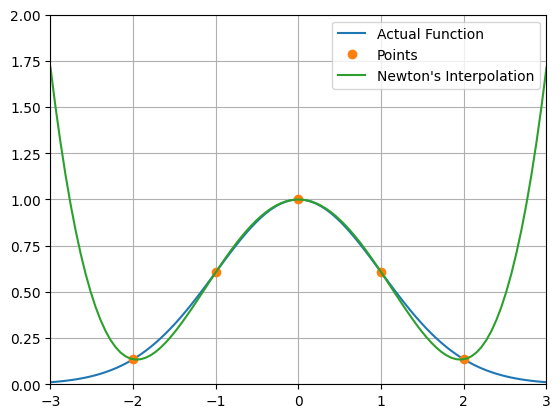

In [14]:
points = [[-2, 0.1353], [-1, 0.6065], [0, 1.0], [1, 0.6065], [2, 0.1353]]
inter = interpolation(points)
coeff_v = inter.vandermonde_polynomial_coefficients()
coeff_n = inter.newtons_polynomial_coefficients()
print("Vandermonde Polynomial Coefficients: ", coeff_v)
print("Newtons Polynomial Coefficients: ", coeff_n)
y_aprx = inter.plotN(function=[lambda x: np.exp((-1 * x ** 2)/2)], xlim=(-3, 3), ylim=(0, 2))

Q.3 For the function $f(x)=\sqrt{x}$, let $f_n(x)$ denote the Newton's polynomial constructed by interpolating $n+1$ equi-spaced sampled points from the interval $[0,4]$. Plot the functions $f,f_2,f_4,f_8,f_{16},f_{32}$, and in another figure plot the error function $e(x)=f(x)-f_n(x)$ by sampling the error function on 1000 equi-spaced points in the interval [0,4]. Find the maximum error $E_n=max_{1≤k≤1000}$ $\{|f(x_k)-f_n(x_k)|\}$, and plot it with respect to $n$. Record your observations.

<p align="justify"> Ploting the function $f(x)=\sqrt{x}$ and $f_2,f_4,f_8,f_{16},f_{32}$.

In [15]:
inter = interpolation([])
y_aprx_list = []

N = 100
base = 2

for i in range(5):

    x = np.linspace(0, 4, base+1)
    y = np.sqrt(x)

    points = [[x[i], y[i]] for i in range(base+1)]
    inter.initialization(points)

    x_list = np.linspace(0, 6, N)
    y_list = []
    for x_val in x_list:
        y_list.append(inter.newton_polynomial(x_val))

    y_aprx_list.append(y_list)
    base *= 2

x = np.linspace(0, 6, N)
y = np.sqrt(x)


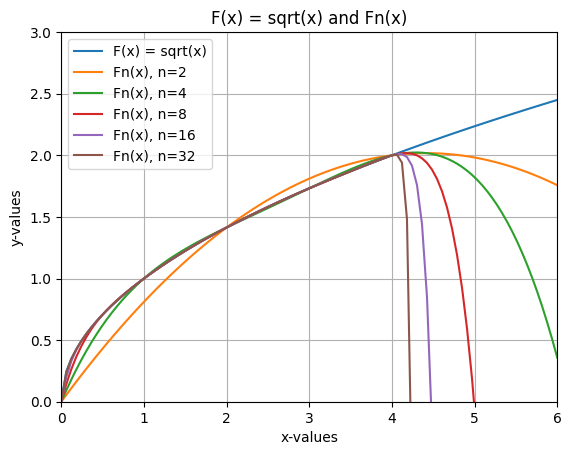

In [16]:
plt.figure()
plt.plot(x, y, label="F(x) = sqrt(x)")

base = 2
for y_aprx in y_aprx_list:
    plt.plot(x, y_aprx, label=f"Fn(x), n={base}")
    base *= 2

plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title("F(x) = sqrt(x) and Fn(x)")
plt.xlim(0, 6)
plt.ylim(0, 3)
plt.legend()
plt.grid()
plt.show()

<p align="justify"> Plotting the error function $e(x)=f(x)-f_n(x)$

In [17]:
inter = interpolation([])
error_functions_list = []

a, b =  0, 4
N = 1000
base = 2

for i in range(5):

    x = np.linspace(0, 4, base+1)
    y = np.sqrt(x)

    points = [[x[i], y[i]] for i in range(base+1)]
    inter.initialization(points)

    x_list = np.linspace(a, b, N)
    y_list = []
    for x_val in x_list:
        y_list.append(inter.newton_polynomial(x_val))

    y_list = np.array(y_list)
    error_functions_list.append(np.sqrt(x_list) - y_list)
    base *= 2

x = np.linspace(a, b, N)
# y = np.sqrt(x)


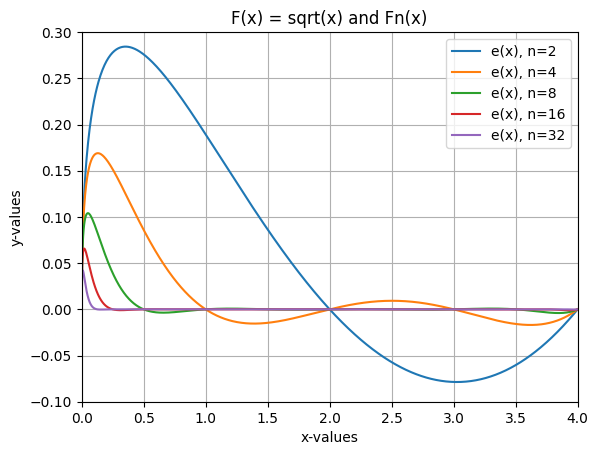

In [18]:
plt.figure()
# plt.plot(x, y, label="F(x) = sqrt(x)")

base = 2
for error in error_functions_list:
    plt.plot(x, error, label=f"e(x), n={base}")
    base *= 2

plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title("F(x) = sqrt(x) and Fn(x)")
plt.xlim(a, b)
plt.ylim(-0.1, 0.3)
plt.legend()
plt.grid()
plt.show()

<p align="justify"> Finding the maximum error $E_n=max_{1≤k≤1000}$ $\{|f(x_k)-f_n(x_k)|\}$, and ploting it with respect to $n$

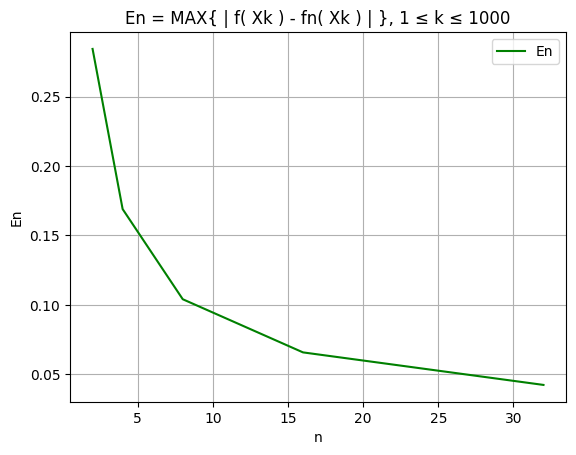

In [19]:
n_list = [2, 4, 8, 16, 32]
En = [max(error) for error in error_functions_list]

plt.plot(n_list, En, label="En", color='green')
plt.xlabel("n")
plt.ylabel("En")
plt.title("En = MAX{ | f( Xk ) - fn( Xk ) | }, 1 ≤ k ≤ 1000")
plt.legend()
plt.grid()
plt.show()